In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('mask_county.csv', index_col=0)
df

,county_name,total_pop,confirmed_cases,deaths,never,rarely,sometimes,frequently,always
0,Baldwin County,218022.0,7348,84,0.083,0.059,0.098,0.323,0.436
1,Calhoun County,114277.0,5254,68,0.152,0.108,0.130,0.167,0.442
2,Cullman County,83442.0,3328,29,0.130,0.024,0.249,0.217,0.379
3,DeKalb County,71385.0,3942,34,0.084,0.051,0.106,0.179,0.580
4,Elmore County,81887.0,3495,60,0.042,0.095,0.127,0.252,0.485
...,...,...,...,...,...,...,...,...,...
817,Waukesha County,403072.0,17722,151,0.071,0.165,0.145,0.258,0.361
818,Winnebago County,171020.0,11331,85,0.074,0.194,0.126,0.156,0.450
819,Wood County,73055.0,2812,18,0.131,0.177,0.215,0.181,0.296
820,Laramie County,98976.0,2744,14,0.143,0.127,0.100,0.221,0.409


In [3]:
# df['log_never'] = round(np.log(df['never']),2)
# df['log_rarely'] = round(np.log(df['rarely']),2)
# df['log_sometimes'] = round(np.log(df['sometimes']),2)
# df['log_frequently'] = round(np.log(df['frequently']),2)
# df['log_always'] =round (np.log(df['always']),2)
# df['log_confirmed_cases'] = round(np.log(df['confirmed_cases']),2)

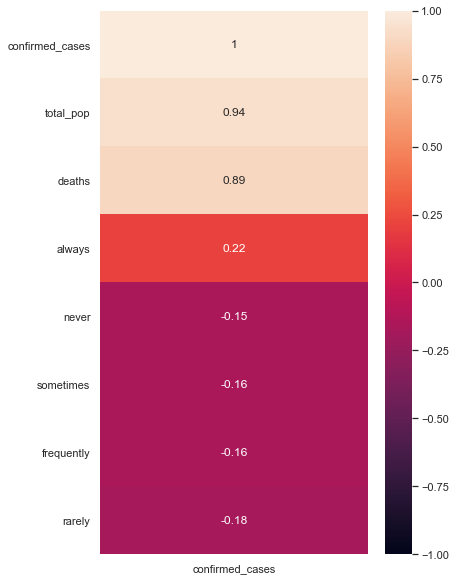

In [4]:
plt.figure(figsize=(6, 10))
sns.heatmap(df.corr()[['confirmed_cases']].sort_values(by='confirmed_cases', ascending=False), annot=True, vmin=-1, vmax=1);

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.get_dummies(df, columns=['county_name'], drop_first=True)

In [7]:
X = df.drop(columns=['deaths', 'confirmed_cases'],axis=1).copy()
y = df['confirmed_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Linear Regression

In [8]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [10]:
print('Linear Rgression training score:', lr.score(X_train_sc, y_train))
print('Linear Rgression testing score:', lr.score(X_test_sc, y_test))

Linear Rgression training score: 0.9792315070324861
Linear Rgression testing score: -2.580539193290569e+24


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_sc, y_train)
params = {'n_estimators': [1, 10, 50, 100], 
         'max_depth': [None,1, 2, 3],
         'max_features':['auto', None]}
gs = GridSearchCV(rf, param_grid=params)
gs.fit(X_train_sc, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', None],
                         'n_estimators': [1, 10, 50, 100]})

In [12]:
print('Random Forest training score:', gs.score(X_train_sc, y_train))
print('Random Forest testing score:', gs.score(X_test_sc, y_test))

Random Forest training score: 0.9693104572027043
Random Forest testing score: 0.660596872411837
